In [310]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC  
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample
from sklearn import svm
import itertools

In [71]:
clean_data = pd.read_csv('clean_data.csv')

In [72]:
clean_data.head()

,Unnamed: 0,index,rate_avg,prescriptions_per_100,uninsured_2015,uninsured_2016,uninsured_2017,population_estimate,Pop <5,Pop 5-9,...,share_student_loan_debt,median_student_loan_debt,share_with_auto_debt,share_with_auto_or_retail_debt,auto_retail_debt_delinquency_rate,Medicinal,Decriminalized,Republican/lean Rep.,No lean,Democrat/lean Dem.
0,0,"Autauga County, AL",10.95,129.6,0.128,0.134,0.110,55049.0,5.8,6.9,...,0.16,19441.000000,0.27,0.35,0.09,No,No,52.0,13.0,35.0
1,1,"Baldwin County, AL",20.95,123.8,0.158,0.175,0.161,199510.0,5.7,6.3,...,0.14,13964.000000,0.33,0.39,0.05,No,No,52.0,13.0,35.0
2,2,"Barbour County, AL",6.95,92.7,0.175,0.174,0.153,26614.0,5.5,6.4,...,0.10,0.053697,0.26,0.38,0.19,No,No,52.0,13.0,35.0
3,3,"Bibb County, AL",16.95,97.2,0.151,0.150,0.136,22572.0,5.1,5.2,...,0.11,0.053697,0.31,0.40,0.12,No,No,52.0,13.0,35.0
4,4,"Blount County, AL",16.95,56.9,0.183,0.176,0.165,57704.0,6.1,6.6,...,0.10,11128.000000,0.28,0.37,0.07,No,No,52.0,13.0,35.0


In [73]:
clean_data = clean_data.drop(['Unnamed: 0','median_student_loan_debt'], axis=1)

In [74]:
clean_data.head()

,index,rate_avg,prescriptions_per_100,uninsured_2015,uninsured_2016,uninsured_2017,population_estimate,Pop <5,Pop 5-9,Pop 10-14,...,median_medical_debt_collections,share_student_loan_debt,share_with_auto_debt,share_with_auto_or_retail_debt,auto_retail_debt_delinquency_rate,Medicinal,Decriminalized,Republican/lean Rep.,No lean,Democrat/lean Dem.
0,"Autauga County, AL",10.95,129.6,0.128,0.134,0.110,55049.0,5.8,6.9,7.7,...,413.0,0.16,0.27,0.35,0.09,No,No,52.0,13.0,35.0
1,"Baldwin County, AL",20.95,123.8,0.158,0.175,0.161,199510.0,5.7,6.3,6.3,...,604.0,0.14,0.33,0.39,0.05,No,No,52.0,13.0,35.0
2,"Barbour County, AL",6.95,92.7,0.175,0.174,0.153,26614.0,5.5,6.4,6.0,...,478.0,0.10,0.26,0.38,0.19,No,No,52.0,13.0,35.0
3,"Bibb County, AL",16.95,97.2,0.151,0.150,0.136,22572.0,5.1,5.2,6.7,...,582.0,0.11,0.31,0.40,0.12,No,No,52.0,13.0,35.0
4,"Blount County, AL",16.95,56.9,0.183,0.176,0.165,57704.0,6.1,6.6,6.8,...,583.0,0.10,0.28,0.37,0.07,No,No,52.0,13.0,35.0


In [75]:
clean_data.dtypes

index                                                                   object
rate_avg                                                               float64
prescriptions_per_100                                                  float64
uninsured_2015                                                         float64
uninsured_2016                                                         float64
uninsured_2017                                                         float64
population_estimate                                                    float64
Pop <5                                                                 float64
Pop 5-9                                                                float64
Pop 10-14                                                              float64
Pop 15-19                                                              float64
Pop 20-24                                                              float64
Pop 25-29                                           

In [76]:
clean_data.head()

,index,rate_avg,prescriptions_per_100,uninsured_2015,uninsured_2016,uninsured_2017,population_estimate,Pop <5,Pop 5-9,Pop 10-14,...,median_medical_debt_collections,share_student_loan_debt,share_with_auto_debt,share_with_auto_or_retail_debt,auto_retail_debt_delinquency_rate,Medicinal,Decriminalized,Republican/lean Rep.,No lean,Democrat/lean Dem.
0,"Autauga County, AL",10.95,129.6,0.128,0.134,0.110,55049.0,5.8,6.9,7.7,...,413.0,0.16,0.27,0.35,0.09,No,No,52.0,13.0,35.0
1,"Baldwin County, AL",20.95,123.8,0.158,0.175,0.161,199510.0,5.7,6.3,6.3,...,604.0,0.14,0.33,0.39,0.05,No,No,52.0,13.0,35.0
2,"Barbour County, AL",6.95,92.7,0.175,0.174,0.153,26614.0,5.5,6.4,6.0,...,478.0,0.10,0.26,0.38,0.19,No,No,52.0,13.0,35.0
3,"Bibb County, AL",16.95,97.2,0.151,0.150,0.136,22572.0,5.1,5.2,6.7,...,582.0,0.11,0.31,0.40,0.12,No,No,52.0,13.0,35.0
4,"Blount County, AL",16.95,56.9,0.183,0.176,0.165,57704.0,6.1,6.6,6.8,...,583.0,0.10,0.28,0.37,0.07,No,No,52.0,13.0,35.0


In [77]:
clean_data['rate_avg'].value_counts()


12.95    373
14.95    368
16.95    342
10.95    340
8.95     316
18.95    245
20.95    210
30.00    192
22.95    171
6.95     166
24.95    126
26.95     91
28.95     72
4.95      59
2.95      33
2.00      31
Name: rate_avg, dtype: int64

In [78]:
for i in range(len(clean_data.rate_avg)): 
    if clean_data.rate_avg[i] > 19.8: 
        clean_data.rate_avg[i] = 0
    else: 
        clean_data.rate_avg[i] = 1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [79]:
clean_data.head()

,index,rate_avg,prescriptions_per_100,uninsured_2015,uninsured_2016,uninsured_2017,population_estimate,Pop <5,Pop 5-9,Pop 10-14,...,median_medical_debt_collections,share_student_loan_debt,share_with_auto_debt,share_with_auto_or_retail_debt,auto_retail_debt_delinquency_rate,Medicinal,Decriminalized,Republican/lean Rep.,No lean,Democrat/lean Dem.
0,"Autauga County, AL",1.0,129.6,0.128,0.134,0.110,55049.0,5.8,6.9,7.7,...,413.0,0.16,0.27,0.35,0.09,No,No,52.0,13.0,35.0
1,"Baldwin County, AL",0.0,123.8,0.158,0.175,0.161,199510.0,5.7,6.3,6.3,...,604.0,0.14,0.33,0.39,0.05,No,No,52.0,13.0,35.0
2,"Barbour County, AL",1.0,92.7,0.175,0.174,0.153,26614.0,5.5,6.4,6.0,...,478.0,0.10,0.26,0.38,0.19,No,No,52.0,13.0,35.0
3,"Bibb County, AL",1.0,97.2,0.151,0.150,0.136,22572.0,5.1,5.2,6.7,...,582.0,0.11,0.31,0.40,0.12,No,No,52.0,13.0,35.0
4,"Blount County, AL",1.0,56.9,0.183,0.176,0.165,57704.0,6.1,6.6,6.8,...,583.0,0.10,0.28,0.37,0.07,No,No,52.0,13.0,35.0


In [80]:
clean_data.to_pickle('clean_data_target.pkl')

In [262]:
clean_data = pd.read_pickle('clean_data_target.pkl')

In [263]:
clean_data.head()

,index,rate_avg,prescriptions_per_100,uninsured_2015,uninsured_2016,uninsured_2017,population_estimate,Pop <5,Pop 5-9,Pop 10-14,...,median_medical_debt_collections,share_student_loan_debt,share_with_auto_debt,share_with_auto_or_retail_debt,auto_retail_debt_delinquency_rate,Medicinal,Decriminalized,Republican/lean Rep.,No lean,Democrat/lean Dem.
0,"Autauga County, AL",1.0,129.6,0.128,0.134,0.110,55049.0,5.8,6.9,7.7,...,413.0,0.16,0.27,0.35,0.09,No,No,52.0,13.0,35.0
1,"Baldwin County, AL",0.0,123.8,0.158,0.175,0.161,199510.0,5.7,6.3,6.3,...,604.0,0.14,0.33,0.39,0.05,No,No,52.0,13.0,35.0
2,"Barbour County, AL",1.0,92.7,0.175,0.174,0.153,26614.0,5.5,6.4,6.0,...,478.0,0.10,0.26,0.38,0.19,No,No,52.0,13.0,35.0
3,"Bibb County, AL",1.0,97.2,0.151,0.150,0.136,22572.0,5.1,5.2,6.7,...,582.0,0.11,0.31,0.40,0.12,No,No,52.0,13.0,35.0
4,"Blount County, AL",1.0,56.9,0.183,0.176,0.165,57704.0,6.1,6.6,6.8,...,583.0,0.10,0.28,0.37,0.07,No,No,52.0,13.0,35.0


In [186]:
# clean_data = pd.get_dummies(clean_data)

## Feature Engineering

In [6]:
clean_data.columns.tolist()

['rate_avg',
 'prescriptions_per_100',
 'uninsured_2015',
 'uninsured_2016',
 'uninsured_2017',
 'population_estimate',
 'Pop <5',
 'Pop 5-9',
 'Pop 10-14',
 'Pop 15-19',
 'Pop 20-24',
 'Pop 25-29',
 'Pop 30-34',
 'Pop 35-39',
 'Pop 40-44',
 'Pop 45-49',
 'Pop 50-54',
 'Pop 55-59',
 'Pop 60-64',
 'Pop 65-69',
 'Pop 70-74',
 'Pop 75-79',
 'Pop 80-84',
 'Pop 85+',
 'median age',
 'Employment/Population Ratio; Estimate; AGE - 16 to 19 years',
 'Employment/Population Ratio; Estimate; AGE - 20 to 24 years',
 'Employment/Population Ratio; Estimate; AGE - 25 to 29 years',
 'Employment/Population Ratio; Estimate; AGE - 30 to 34 years',
 'Employment/Population Ratio; Estimate; AGE - 35 to 44 years',
 'Employment/Population Ratio; Estimate; AGE - 45 to 54 years',
 'Employment/Population Ratio; Estimate; AGE - 55 to 59 years',
 'Employment/Population Ratio; Estimate; AGE - 60 to 64 years',
 'Employment/Population Ratio; Estimate; AGE - 65 to 74 years',
 'Employment/Population Ratio; Estimate; AGE

In [7]:
clean_data['Under 30'] = clean_data.apply(lambda row: row['Pop <5'] + row['Pop 5-9'] + row['Pop 10-14'] + row['Pop 15-19'] + row['Pop 20-24'] + row['Pop 25-29'], axis=1)
clean_data['30 to 44'] = clean_data.apply(lambda row: row['Pop 30-34'] + row['Pop 35-39'] + row['Pop 40-44'], axis=1)
clean_data['45 to 64'] = clean_data.apply(lambda row: row['Pop 45-49'] + row['Pop 50-54'] + row['Pop 55-59'] + row['Pop 60-64'], axis=1)
clean_data['65 and over'] = clean_data.apply(lambda row: row['Pop 65-69'] + row['Pop 70-74'] + row['Pop 75-79'] + row['Pop 80-84'] + row['Pop 85+'], axis=1)

In [8]:
clean_data['yoy_change_uninsured'] = clean_data.apply(lambda row: (row['uninsured_2016']-row['uninsured_2015'])/row['uninsured_2015'], axis=1)

In [9]:
#https://elitedatascience.com/imbalanced-classes
df_majority = clean_data[clean_data.rate_avg==1]
df_minority = clean_data[clean_data.rate_avg==0]

df_majority_downsampled = resample(df_majority, 
                                 replace=False,    
                                 n_samples=862,  
                                 random_state=123)

df_downsampled = pd.concat([df_majority_downsampled, df_minority])

df_downsampled.rate_avg.value_counts()

0.0    862
1.0    862
Name: rate_avg, dtype: int64

In [10]:
for col in df_downsampled.columns:
    df_downsampled[col] = (df_downsampled[col]-min(df_downsampled[col]))/ (max(df_downsampled[col]) - min(df_downsampled[col]))

In [11]:
X = df_downsampled.drop('rate_avg', axis=1)
y = df_downsampled.rate_avg

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Vanilla Test Model 

In [13]:
logreg = LogisticRegression(fit_intercept = False, C = 1e12) 

model_log = logreg.fit(X_train, y_train)
model_log

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [14]:
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

In [15]:
residuals = y_train - y_hat_train
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

 0.0    948
-1.0    183
 1.0    162
Name: rate_avg, dtype: int64
 0.0    0.733179
-1.0    0.141531
 1.0    0.125290
Name: rate_avg, dtype: float64


In [16]:
residuals = y_test - y_hat_test
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

 0.0    327
-1.0     58
 1.0     46
Name: rate_avg, dtype: int64
 0.0    0.758701
-1.0    0.134571
 1.0    0.106729
Name: rate_avg, dtype: float64


## Testing Models

In [17]:
# Construct pipeline
pipe_rf = Pipeline([('clf', RandomForestClassifier(random_state = 123))])

# Set grid search params
param_grid_forest = [ 
  {'clf__n_estimators': [100, 120],
   'clf__criterion': ['entropy', 'gini'], 
   'clf__max_depth': [4, 5, 6],  
   'clf__min_samples_leaf':[0.05 ,0.1, 0.2, 1, 2],  
   'clf__min_samples_split':[0.05 ,0.1, 0.2, 1.0, 2]
  }
]

# Construct grid search
gs_rf = GridSearchCV(estimator=pipe_rf,
            param_grid=param_grid_forest,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit using grid search
gs_rf.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_rf.best_score_)

# Best params
print('\nBest params:\n', gs_rf.best_params_)

Fitting 3 folds for each of 300 candidates, totalling 900 fits
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=100, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=100 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=100, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=4, clf_

[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=100, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_sa

[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=100 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=100, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samp

[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=1, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.8s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=1, clf__min_samples_split=0.1, clf__n_estimators=100 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=1, clf__min_samples_split=0.1, clf__n_estimators=100, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=1, clf__min_samples_split=0.1, clf__n_estimators=100 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=1, clf__min_samples_split=0.1, clf__n_estimators=100, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=1, clf__min_samples_split=0.1, clf__n_estimators=100 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=1, clf__min_samples_split=0.1, clf__n_estimators=100, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=1, clf__m

[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=0.1, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=0.1, clf__n_estimators=100 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=0.1, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=2, clf__mi

[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=100 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_sa

[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=100 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=100 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_l

[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=100 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=100, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=100 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=100, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=100 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=100, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_l

[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=0.2, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=0.2, clf__n_estimators=100 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=0.2, clf__n_estimators=100, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=1, clf__mi

[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=2, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.6s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=2, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=2, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.5s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=2, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=2, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=2, clf__min_samples_split=1.0, clf__n_estimators=100 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=2, clf__min_samples_split=1.0, clf__n_estimators=100, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=2, clf__mi

[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=1.0, clf__n_estimators=100 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=1.0, clf__n_estimators=100, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=1.0, clf__n_estimators=100 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=1.0, clf__n_estimators=100, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=1.0, clf__n_estimators=100 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=1.0, clf__n_estimators=100, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_sa

[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=1.0, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=1.0, clf__n_estimators=100 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=1.0, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=1.0, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=1.0, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=1.0, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=1.0, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_l

[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=1.0, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=1.0, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=1.0, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=1.0, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=1.0, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=1.0, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=1.0, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_l

[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=1, clf__min_samples_split=1.0, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=1, clf__min_samples_sp

[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=2, clf__min_samples_spli

[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=2, clf__n_estimators=120, total=   0.5s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=2, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=2, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=100 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_s

[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=2, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=100 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=100 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=100 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=100, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_sa

[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=1, clf__min_samples_split=0.05, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=1, clf__min_samples_split=0.05, clf__n_estimators=100 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=1, clf__min_samples_split=0.05, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=1, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=1, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=1, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=1, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=1, clf__min_samples_split=0

[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=0.1, clf__n_estimators=100 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=0.1, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=0.1, clf__n_estimators=100 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=0.1, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=0.1, 

[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=100 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__mi

[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=100 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.1, clf__min_sample

[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=100 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=100, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=100 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=100, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=100 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=100, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_sample

[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=0.2, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=0.2, clf__n_estimators=100 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=0.2, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=0.2, clf

[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=2, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=2, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=2, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=2, clf__min_samples_split=1.0, clf__n_estimators=100 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=2, clf__min_samples_split=1.0, clf__n_estimators=100, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=2, clf__min_samples_split=1.0, clf__n_estimators=100 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=2, clf__min_samples_split=1.0, clf__n_estimators=100, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=2, clf__min_samples_split=1.0, clf

[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=1.0, clf__n_estimators=100, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=1.0, clf__n_estimators=100 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=1.0, clf__n_estimators=100, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=1.0, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=1.0, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=1.0, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=1.0, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__mi

[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=1.0, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=1.0, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=1.0, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=2, clf__n_estimators=100 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=2, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=2, clf__n_estimators=100 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=2, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=

[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=2, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=2, clf__n_estimators=100 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=2, clf__n_estimators=100, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=2, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=2, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=2, clf

[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=2, clf__min_samples_split=0.05, clf__n_estimators=100 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=2, clf__min_samples_split=0.05, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=2, clf__min_samples_split=0.05, clf__n_estimators=100 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=2, clf__min_samples_split=0.05, clf__n_estimators=100, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=2, clf__min_samples_split=0.05, clf_

[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:  3.9min finished


Best accuracy: 0.723

Best params:
 {'clf__criterion': 'gini', 'clf__max_depth': 6, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 120}


In [18]:

# Construct pipeline
pipe_knn = Pipeline([('clf', KNeighborsClassifier())])

# Set grid search params
knn_param_grid = {
    'clf__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]
}


# Construct grid search
gs_knn = GridSearchCV(estimator=pipe_knn,
            param_grid=knn_param_grid,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit using grid search
gs_knn.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_knn.best_score_)

# Best params
print('\nBest params:\n', gs_knn.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] clf__n_neighbors=1 ..............................................
[CV] ............................... clf__n_neighbors=1, total=   0.0s
[CV] clf__n_neighbors=1 ..............................................
[CV] ............................... clf__n_neighbors=1, total=   0.0s
[CV] clf__n_neighbors=1 ..............................................
[CV] ............................... clf__n_neighbors=1, total=   0.0s
[CV] clf__n_neighbors=2 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ............................... clf__n_neighbors=2, total=   0.0s
[CV] clf__n_neighbors=2 ..............................................
[CV] ............................... clf__n_neighbors=2, total=   0.1s
[CV] clf__n_neighbors=2 ..............................................
[CV] ............................... clf__n_neighbors=2, total=   0.0s
[CV] clf__n_neighbors=3 ..............................................
[CV] ............................... clf__n_neighbors=3, total=   0.0s
[CV] clf__n_neighbors=3 ..............................................
[CV] ............................... clf__n_neighbors=3, total=   0.0s
[CV] clf__n_neighbors=3 ..............................................
[CV] ............................... clf__n_neighbors=3, total=   0.0s
[CV] clf__n_neighbors=4 ..............................................
[CV] ............................... clf__n_neighbors=4, total=   0.0s
[CV] clf__n_neighbors=4 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    2.4s finished


In [19]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))

In [20]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train) 
y_pred = svclassifier.predict(X_test)
svclassifier.score(X_test, y_test)
print_metrics(y_test, y_pred)

Precision Score: 0.7149532710280374
Recall Score: 0.7536945812807881
Accuracy Score: 0.7424593967517401
F1 Score: 0.7338129496402878


In [21]:
def show_cf(y_true, y_pred, class_names=None, model_name=None):
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

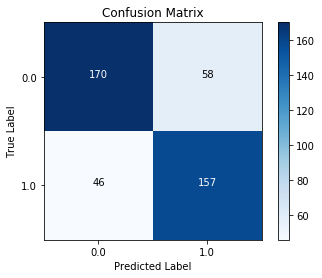

In [22]:
show_cf(y_test, y_hat_test)

In [23]:
#finding feature coefficients
coef_list = svclassifier.coef_.tolist()[0]

In [24]:
#finding most important features (helpful link to understand feature meaning with SVM https://stats.stackexchange.com/questions/39243/how-does-one-interpret-svm-feature-weights)
impt_list_c = []
impt_list_f = []
for i in range(len(coef_list)): 
    if abs(coef_list[i]) > 1:
        impt_coef = abs(coef_list[i])
        impt_feat = X_train.columns[i]
        impt_list_c.append(impt_coef)
        impt_list_f.append(impt_feat)
        print(impt_coef, impt_feat)

2.495309928327455 prescriptions_per_100
2.194972328150031 population_estimate
1.7305160535158985 Pop 65-69
1.8252297280368395 Pop 85+
1.495093963372047 Employment/Population Ratio; Estimate; AGE - 45 to 54 years
1.2556632669409358 Employment/Population Ratio; Estimate; AGE - 55 to 59 years
1.0856955687570364 Employment/Population Ratio; Estimate; AGE - 60 to 64 years
1.9930321461254095 percent_in_civilian_labor_force_unemployed
1.1737873273497315 share_medical_debt_collections
1.8143379645385371 share_student_loan_debt
1.0544995906400163 share_with_auto_or_retail_debt
1.1430533561308143 auto_retail_debt_delinquency_rate
1.2764415971713583 No lean
1.1827090151356778 yoy_change_uninsured


<BarContainer object of 14 artists>

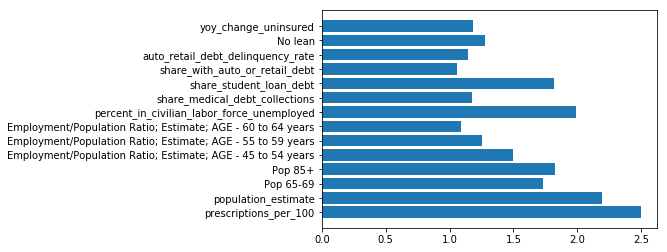

In [25]:
fig, ax = plt.subplots()
ax.barh(impt_list_f, impt_list_c)

## Linear Regression for Prescriptions

In [26]:
clean_data_lin_reg = clean_data.drop(['rate_avg'], axis=1)

In [27]:
clean_data_lin_reg.head()

,prescriptions_per_100,uninsured_2015,uninsured_2016,uninsured_2017,population_estimate,Pop <5,Pop 5-9,Pop 10-14,Pop 15-19,Pop 20-24,...,Medicinal_No,Medicinal_Yes,Decriminalized_No,Decriminalized_Reduced,Decriminalized_Yes,Under 30,30 to 44,45 to 64,65 and over,yoy_change_uninsured
0,129.6,0.128,0.134,0.110,55049.0,5.8,6.9,7.7,7.2,6.2,...,1,0,1,0,0,40.1,19.6,26.4,14.8,0.046875
1,123.8,0.158,0.175,0.161,199510.0,5.7,6.3,6.3,6.1,5.5,...,1,0,1,0,0,35.5,18.1,27.7,19.6,0.107595
2,92.7,0.175,0.174,0.153,26614.0,5.5,6.4,6.0,5.7,7.3,...,1,0,1,0,0,37.7,19.3,26.5,17.4,-0.005714
3,97.2,0.151,0.150,0.136,22572.0,5.1,5.2,6.7,6.8,6.4,...,1,0,1,0,0,37.3,20.2,27.6,15.8,-0.006623
4,56.9,0.183,0.176,0.165,57704.0,6.1,6.6,6.8,6.8,5.4,...,1,0,1,0,0,37.3,18.6,27.0,17.9,-0.038251


In [28]:
clean_data_lin_reg = clean_data.drop(['rate_avg'], axis=1)

y = clean_data_lin_reg.prescriptions_per_100
X = clean_data_lin_reg.drop(['prescriptions_per_100'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 32, test_size=0.20)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

rmse_train = np.sqrt(np.sum((y_train-y_hat_train)**2))/len(y_train)
rmse_test = np.sqrt(np.sum((y_test-y_hat_test)**2))/len(y_test)
print('Train Root Mean Squarred Error:', rmse_train)
print('Test Root Mean Squarred Error:', rmse_test)

Train Root Mean Squarred Error: 0.6745338436509113
Test Root Mean Squarred Error: 1.5934910848142463


In [29]:
coef_list = linreg.coef_.tolist()

In [30]:
#finding most important features (helpful link to understand feature meaning with SVM https://stats.stackexchange.com/questions/39243/how-does-one-interpret-svm-feature-weights)
coef_list = linreg.coef_.tolist()

impt_list_c = []
impt_list_f = []
for i in range(len(coef_list)): 
    if abs(coef_list[i]) > 1:
        impt_coef = abs(coef_list[i])
        impt_feat = X_train.columns[i]
        impt_list_c.append(impt_coef)
        impt_list_f.append(impt_feat)
        print(impt_coef, impt_feat)
        
fig, ax = plt.subplots(figsize=(20, 10))
ax.barh(impt_list_f, impt_list_c)

88.241627220638 uninsured_2015
34.610658912977584 uninsured_2016
10.484916806305794 uninsured_2017
2.0131755190535525 Pop 5-9
2.900385628778456 Pop 10-14
1.0673539276459687 Pop 25-29
3.5912931106095107 Pop 30-34
1.0816277762941884 Pop 35-39
1.9784555627185267 Pop 40-44
2.011493904628902 Pop 50-54
1.6426247634659064 Pop 55-59
1.222766462375018 Pop 75-79
1.222766462375718 Pop 80-84
3.324992478927238 Pop 85+
1.5097508545573044 median age
533.7272551649844 percent_in_labor_force
18.472266083042776 percent_in_civilian_labor_force
6.873641526097604 percent_in_civilian_labor_force_employed
4.931457097130464 percent_in_civilian_labor_force_unemployed
23.729531569815045 percent_in_labor_force_armed_forces
510.5436885687917 percent_not_in_labor_force
46.46653090224268 share_medical_debt_collections
80.02961563471641 share_student_loan_debt
8.60936973654663 share_with_auto_debt
34.338633930216936 share_with_auto_or_retail_debt
4.765995386823044 auto_retail_debt_delinquency_rate
6.30395737499911 R

<BarContainer object of 38 artists>

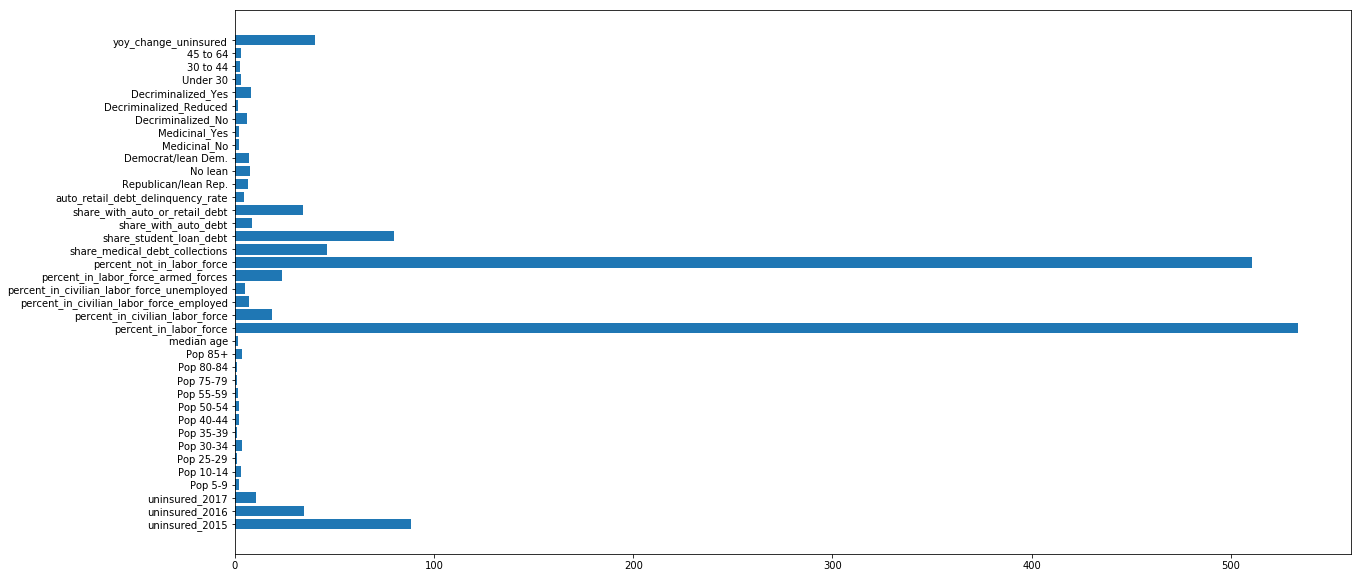

In [31]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.barh(impt_list_f, impt_list_c)

## Adding Data

In [264]:
clean_data.columns.tolist()

['index',
 'rate_avg',
 'prescriptions_per_100',
 'uninsured_2015',
 'uninsured_2016',
 'uninsured_2017',
 'population_estimate',
 'Pop <5',
 'Pop 5-9',
 'Pop 10-14',
 'Pop 15-19',
 'Pop 20-24',
 'Pop 25-29',
 'Pop 30-34',
 'Pop 35-39',
 'Pop 40-44',
 'Pop 45-49',
 'Pop 50-54',
 'Pop 55-59',
 'Pop 60-64',
 'Pop 65-69',
 'Pop 70-74',
 'Pop 75-79',
 'Pop 80-84',
 'Pop 85+',
 'median age',
 'Employment/Population Ratio; Estimate; AGE - 16 to 19 years',
 'Employment/Population Ratio; Estimate; AGE - 20 to 24 years',
 'Employment/Population Ratio; Estimate; AGE - 25 to 29 years',
 'Employment/Population Ratio; Estimate; AGE - 30 to 34 years',
 'Employment/Population Ratio; Estimate; AGE - 35 to 44 years',
 'Employment/Population Ratio; Estimate; AGE - 45 to 54 years',
 'Employment/Population Ratio; Estimate; AGE - 55 to 59 years',
 'Employment/Population Ratio; Estimate; AGE - 60 to 64 years',
 'Employment/Population Ratio; Estimate; AGE - 65 to 74 years',
 'Employment/Population Ratio; Est

https://apps.bea.gov/regional/downloadzip.cfm

http://www.thearda.com/Archive/Files/Downloads/RCMSCY_DL2.asp

In [265]:
religion = pd.read_excel('data/religion.xlsx')

In [266]:
religion.head()

,TOTCG,TOTAD,ADJAD,TOTRT,ADJRATE,MAINCG,MAINAD,MAINRT,EVANCG,EVANAD,...,ZOARCG,ZOARAD,ZOARRT,POP200,FIP,STCOD,CTYCOD,STATE,COUNTY,STATEAB
0,73,24505,30790.748170,561.127522,705.061670,12,3657,83.739782,59,18893,...,0,0,0,43671.0,1001,1,1,Alabama,Autauga,AL
1,201,66336,78855.706198,472.428159,561.590330,44,16399,116.789517,139,38670,...,0,0,0,140415.0,1003,1,3,Alabama,Baldwin,AL
2,66,11955,19893.598970,411.701908,685.088469,17,2492,85.818583,47,8935,...,0,0,0,29038.0,1005,1,5,Alabama,Barbour,AL
3,67,9656,12665.334900,463.651205,608.150144,9,513,24.632671,58,9141,...,0,0,0,20826.0,1007,1,7,Alabama,Bibb,AL
4,138,25916,28750.920555,507.917843,563.478374,26,3632,71.182189,110,21732,...,0,0,0,51024.0,1009,1,9,Alabama,Blount,AL


In [267]:
religion_data = religion[['TOTCG', 'TOTAD', 'ADJAD', 'TOTRT', 'ADJRATE', 'COUNTY', 'STATEAB']]
religion_data.columns = ['total_num_congregations', 'total_num_adherents', 'adjusted_total_num_adherents', 'total_adherence_per_1k', 'adjusted_adherence_per_1k', 'county', 'state_abbreviation']

In [268]:
religion_data['county'] = religion_data['county'] + ' County, ' + religion_data['state_abbreviation']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [269]:
religion_data.head()

,total_num_congregations,total_num_adherents,adjusted_total_num_adherents,total_adherence_per_1k,adjusted_adherence_per_1k,county,state_abbreviation
0,73,24505,30790.748170,561.127522,705.061670,"Autauga County, AL",AL
1,201,66336,78855.706198,472.428159,561.590330,"Baldwin County, AL",AL
2,66,11955,19893.598970,411.701908,685.088469,"Barbour County, AL",AL
3,67,9656,12665.334900,463.651205,608.150144,"Bibb County, AL",AL
4,138,25916,28750.920555,507.917843,563.478374,"Blount County, AL",AL


In [270]:
clean_data.head()

,index,rate_avg,prescriptions_per_100,uninsured_2015,uninsured_2016,uninsured_2017,population_estimate,Pop <5,Pop 5-9,Pop 10-14,...,median_medical_debt_collections,share_student_loan_debt,share_with_auto_debt,share_with_auto_or_retail_debt,auto_retail_debt_delinquency_rate,Medicinal,Decriminalized,Republican/lean Rep.,No lean,Democrat/lean Dem.
0,"Autauga County, AL",1.0,129.6,0.128,0.134,0.110,55049.0,5.8,6.9,7.7,...,413.0,0.16,0.27,0.35,0.09,No,No,52.0,13.0,35.0
1,"Baldwin County, AL",0.0,123.8,0.158,0.175,0.161,199510.0,5.7,6.3,6.3,...,604.0,0.14,0.33,0.39,0.05,No,No,52.0,13.0,35.0
2,"Barbour County, AL",1.0,92.7,0.175,0.174,0.153,26614.0,5.5,6.4,6.0,...,478.0,0.10,0.26,0.38,0.19,No,No,52.0,13.0,35.0
3,"Bibb County, AL",1.0,97.2,0.151,0.150,0.136,22572.0,5.1,5.2,6.7,...,582.0,0.11,0.31,0.40,0.12,No,No,52.0,13.0,35.0
4,"Blount County, AL",1.0,56.9,0.183,0.176,0.165,57704.0,6.1,6.6,6.8,...,583.0,0.10,0.28,0.37,0.07,No,No,52.0,13.0,35.0


In [271]:
clean_data = clean_data.merge(religion_data, left_on='index', right_on='county')

In [272]:
clean_data.head()

,index,rate_avg,prescriptions_per_100,uninsured_2015,uninsured_2016,uninsured_2017,population_estimate,Pop <5,Pop 5-9,Pop 10-14,...,Republican/lean Rep.,No lean,Democrat/lean Dem.,total_num_congregations,total_num_adherents,adjusted_total_num_adherents,total_adherence_per_1k,adjusted_adherence_per_1k,county,state_abbreviation
0,"Autauga County, AL",1.0,129.6,0.128,0.134,0.110,55049.0,5.8,6.9,7.7,...,52.0,13.0,35.0,73,24505,30790.748170,561.127522,705.061670,"Autauga County, AL",AL
1,"Baldwin County, AL",0.0,123.8,0.158,0.175,0.161,199510.0,5.7,6.3,6.3,...,52.0,13.0,35.0,201,66336,78855.706198,472.428159,561.590330,"Baldwin County, AL",AL
2,"Barbour County, AL",1.0,92.7,0.175,0.174,0.153,26614.0,5.5,6.4,6.0,...,52.0,13.0,35.0,66,11955,19893.598970,411.701908,685.088469,"Barbour County, AL",AL
3,"Bibb County, AL",1.0,97.2,0.151,0.150,0.136,22572.0,5.1,5.2,6.7,...,52.0,13.0,35.0,67,9656,12665.334900,463.651205,608.150144,"Bibb County, AL",AL
4,"Blount County, AL",1.0,56.9,0.183,0.176,0.165,57704.0,6.1,6.6,6.8,...,52.0,13.0,35.0,138,25916,28750.920555,507.917843,563.478374,"Blount County, AL",AL


In [273]:
clean_data.isna().sum()

index                                                                  0
rate_avg                                                               0
prescriptions_per_100                                                  0
uninsured_2015                                                         0
uninsured_2016                                                         0
uninsured_2017                                                         0
population_estimate                                                    0
Pop <5                                                                 0
Pop 5-9                                                                0
Pop 10-14                                                              0
Pop 15-19                                                              0
Pop 20-24                                                              0
Pop 25-29                                                              0
Pop 30-34                                          

In [274]:
clean_data.dtypes

index                                                                   object
rate_avg                                                               float64
prescriptions_per_100                                                  float64
uninsured_2015                                                         float64
uninsured_2016                                                         float64
uninsured_2017                                                         float64
population_estimate                                                    float64
Pop <5                                                                 float64
Pop 5-9                                                                float64
Pop 10-14                                                              float64
Pop 15-19                                                              float64
Pop 20-24                                                              float64
Pop 25-29                                           

In [275]:
clean_data = clean_data.drop(['county', 'state_abbreviation'], axis=1)

In [276]:
clean_data.head()

,index,rate_avg,prescriptions_per_100,uninsured_2015,uninsured_2016,uninsured_2017,population_estimate,Pop <5,Pop 5-9,Pop 10-14,...,Medicinal,Decriminalized,Republican/lean Rep.,No lean,Democrat/lean Dem.,total_num_congregations,total_num_adherents,adjusted_total_num_adherents,total_adherence_per_1k,adjusted_adherence_per_1k
0,"Autauga County, AL",1.0,129.6,0.128,0.134,0.110,55049.0,5.8,6.9,7.7,...,No,No,52.0,13.0,35.0,73,24505,30790.748170,561.127522,705.061670
1,"Baldwin County, AL",0.0,123.8,0.158,0.175,0.161,199510.0,5.7,6.3,6.3,...,No,No,52.0,13.0,35.0,201,66336,78855.706198,472.428159,561.590330
2,"Barbour County, AL",1.0,92.7,0.175,0.174,0.153,26614.0,5.5,6.4,6.0,...,No,No,52.0,13.0,35.0,66,11955,19893.598970,411.701908,685.088469
3,"Bibb County, AL",1.0,97.2,0.151,0.150,0.136,22572.0,5.1,5.2,6.7,...,No,No,52.0,13.0,35.0,67,9656,12665.334900,463.651205,608.150144
4,"Blount County, AL",1.0,56.9,0.183,0.176,0.165,57704.0,6.1,6.6,6.8,...,No,No,52.0,13.0,35.0,138,25916,28750.920555,507.917843,563.478374


In [277]:
fentanyl_seizures = pd.read_csv('data/fentanyl_state_level.csv')

In [278]:
fentanyl_seizures = fentanyl_seizures.loc[fentanyl_seizures['YEAR']==2016]

In [279]:
fentanyl_seizures.head()

,STATEFP,STATE,STATEABBREVIATION,YEAR,INDICATOR,VALUE
0,1,Alabama,AL,2016,fentanyl_seize,97.0
2,2,Alaska,AK,2016,fentanyl_seize,11.0
4,4,Arizona,AZ,2016,fentanyl_seize,78.0
6,5,Arkansas,AR,2016,fentanyl_seize,58.0
8,6,California,CA,2016,fentanyl_seize,215.0


In [280]:
fentanyl_seizures.columns = ['statefp', 'state', 'state_abbrev', 'year', 'indicator', 'fentanyl_seizures']

In [281]:
fentanyl_seizures.isna().sum()

statefp              0
state                0
state_abbrev         0
year                 0
indicator            0
fentanyl_seizures    1
dtype: int64

In [282]:
fentanyl_seizures['fentanyl_seizures'] = fentanyl_seizures['fentanyl_seizures'].fillna(fentanyl_seizures['fentanyl_seizures'].mean())

In [283]:
fentanyl_seizures.isna().sum()

statefp              0
state                0
state_abbrev         0
year                 0
indicator            0
fentanyl_seizures    0
dtype: int64

In [284]:
clean_data['abbrev'] = clean_data['index'].str.slice(-2)

In [285]:
clean_data.shape

(2959, 63)

In [286]:
clean_data = clean_data.merge(fentanyl_seizures, left_on='abbrev', right_on='state_abbrev')

In [287]:
clean_data.head()

,index,rate_avg,prescriptions_per_100,uninsured_2015,uninsured_2016,uninsured_2017,population_estimate,Pop <5,Pop 5-9,Pop 10-14,...,adjusted_total_num_adherents,total_adherence_per_1k,adjusted_adherence_per_1k,abbrev,statefp,state,state_abbrev,year,indicator,fentanyl_seizures
0,"Autauga County, AL",1.0,129.6,0.128,0.134,0.110,55049.0,5.8,6.9,7.7,...,30790.748170,561.127522,705.061670,AL,1,Alabama,AL,2016,fentanyl_seize,97.0
1,"Baldwin County, AL",0.0,123.8,0.158,0.175,0.161,199510.0,5.7,6.3,6.3,...,78855.706198,472.428159,561.590330,AL,1,Alabama,AL,2016,fentanyl_seize,97.0
2,"Barbour County, AL",1.0,92.7,0.175,0.174,0.153,26614.0,5.5,6.4,6.0,...,19893.598970,411.701908,685.088469,AL,1,Alabama,AL,2016,fentanyl_seize,97.0
3,"Bibb County, AL",1.0,97.2,0.151,0.150,0.136,22572.0,5.1,5.2,6.7,...,12665.334900,463.651205,608.150144,AL,1,Alabama,AL,2016,fentanyl_seize,97.0
4,"Blount County, AL",1.0,56.9,0.183,0.176,0.165,57704.0,6.1,6.6,6.8,...,28750.920555,507.917843,563.478374,AL,1,Alabama,AL,2016,fentanyl_seize,97.0


In [288]:
clean_data.shape

(2959, 69)

In [289]:
non_med = pd.read_csv('data/non_med_use.csv')

In [290]:
non_med.isna().sum()

STATEFP               0
COUNTYFP              0
YEAR                  0
INDICATOR             0
VALUE                79
STATE                 0
STATEABBREVIATION     0
COUNTY                0
dtype: int64

In [291]:
non_med.head()

,STATEFP,COUNTYFP,YEAR,INDICATOR,VALUE,STATE,STATEABBREVIATION,COUNTY
0,1,1,2014,nonmedpain,5.12,Alabama,AL,Autauga County
1,1,3,2014,nonmedpain,5.27,Alabama,AL,Baldwin County
2,1,5,2014,nonmedpain,5.27,Alabama,AL,Barbour County
3,1,7,2014,nonmedpain,5.62,Alabama,AL,Bibb County
4,1,9,2014,nonmedpain,5.62,Alabama,AL,Blount County


In [292]:
non_med['county_state'] = non_med['COUNTY'] + ', ' + non_med['STATEABBREVIATION']

In [293]:
non_med.head()

,STATEFP,COUNTYFP,YEAR,INDICATOR,VALUE,STATE,STATEABBREVIATION,COUNTY,county_state
0,1,1,2014,nonmedpain,5.12,Alabama,AL,Autauga County,"Autauga County, AL"
1,1,3,2014,nonmedpain,5.27,Alabama,AL,Baldwin County,"Baldwin County, AL"
2,1,5,2014,nonmedpain,5.27,Alabama,AL,Barbour County,"Barbour County, AL"
3,1,7,2014,nonmedpain,5.62,Alabama,AL,Bibb County,"Bibb County, AL"
4,1,9,2014,nonmedpain,5.62,Alabama,AL,Blount County,"Blount County, AL"


In [294]:
non_med.columns = ['statefp', 'countyfp', 'year', 'indicator', 'non_med', 'state', 'state_abbrev', 'county', 'county_state']

In [295]:
clean_data = clean_data.merge(non_med, left_on='index', right_on='county_state')

In [296]:
clean_data.shape

(2954, 78)

In [297]:
clean_data.head()

,index,rate_avg,prescriptions_per_100,uninsured_2015,uninsured_2016,uninsured_2017,population_estimate,Pop <5,Pop 5-9,Pop 10-14,...,fentanyl_seizures,statefp_y,countyfp,year_y,indicator_y,non_med,state_y,state_abbrev_y,county,county_state
0,"Autauga County, AL",1.0,129.6,0.128,0.134,0.110,55049.0,5.8,6.9,7.7,...,97.0,1,1,2014,nonmedpain,5.12,Alabama,AL,Autauga County,"Autauga County, AL"
1,"Baldwin County, AL",0.0,123.8,0.158,0.175,0.161,199510.0,5.7,6.3,6.3,...,97.0,1,3,2014,nonmedpain,5.27,Alabama,AL,Baldwin County,"Baldwin County, AL"
2,"Barbour County, AL",1.0,92.7,0.175,0.174,0.153,26614.0,5.5,6.4,6.0,...,97.0,1,5,2014,nonmedpain,5.27,Alabama,AL,Barbour County,"Barbour County, AL"
3,"Bibb County, AL",1.0,97.2,0.151,0.150,0.136,22572.0,5.1,5.2,6.7,...,97.0,1,7,2014,nonmedpain,5.62,Alabama,AL,Bibb County,"Bibb County, AL"
4,"Blount County, AL",1.0,56.9,0.183,0.176,0.165,57704.0,6.1,6.6,6.8,...,97.0,1,9,2014,nonmedpain,5.62,Alabama,AL,Blount County,"Blount County, AL"


In [298]:
clean_data.columns.tolist()

['index',
 'rate_avg',
 'prescriptions_per_100',
 'uninsured_2015',
 'uninsured_2016',
 'uninsured_2017',
 'population_estimate',
 'Pop <5',
 'Pop 5-9',
 'Pop 10-14',
 'Pop 15-19',
 'Pop 20-24',
 'Pop 25-29',
 'Pop 30-34',
 'Pop 35-39',
 'Pop 40-44',
 'Pop 45-49',
 'Pop 50-54',
 'Pop 55-59',
 'Pop 60-64',
 'Pop 65-69',
 'Pop 70-74',
 'Pop 75-79',
 'Pop 80-84',
 'Pop 85+',
 'median age',
 'Employment/Population Ratio; Estimate; AGE - 16 to 19 years',
 'Employment/Population Ratio; Estimate; AGE - 20 to 24 years',
 'Employment/Population Ratio; Estimate; AGE - 25 to 29 years',
 'Employment/Population Ratio; Estimate; AGE - 30 to 34 years',
 'Employment/Population Ratio; Estimate; AGE - 35 to 44 years',
 'Employment/Population Ratio; Estimate; AGE - 45 to 54 years',
 'Employment/Population Ratio; Estimate; AGE - 55 to 59 years',
 'Employment/Population Ratio; Estimate; AGE - 60 to 64 years',
 'Employment/Population Ratio; Estimate; AGE - 65 to 74 years',
 'Employment/Population Ratio; Est

In [299]:
clean_data = clean_data.drop(['index', 'abbrev', 'statefp_x', 'state_x', 'state_abbrev_x', 'year_x', 'indicator_x', 'statefp_y', 'countyfp', 'year_y', 'indicator_y', 'state_y', 'state_abbrev_y', 'county', 'county_state'], axis=1)

In [300]:
clean_data.head()

,rate_avg,prescriptions_per_100,uninsured_2015,uninsured_2016,uninsured_2017,population_estimate,Pop <5,Pop 5-9,Pop 10-14,Pop 15-19,...,Republican/lean Rep.,No lean,Democrat/lean Dem.,total_num_congregations,total_num_adherents,adjusted_total_num_adherents,total_adherence_per_1k,adjusted_adherence_per_1k,fentanyl_seizures,non_med
0,1.0,129.6,0.128,0.134,0.110,55049.0,5.8,6.9,7.7,7.2,...,52.0,13.0,35.0,73,24505,30790.748170,561.127522,705.061670,97.0,5.12
1,0.0,123.8,0.158,0.175,0.161,199510.0,5.7,6.3,6.3,6.1,...,52.0,13.0,35.0,201,66336,78855.706198,472.428159,561.590330,97.0,5.27
2,1.0,92.7,0.175,0.174,0.153,26614.0,5.5,6.4,6.0,5.7,...,52.0,13.0,35.0,66,11955,19893.598970,411.701908,685.088469,97.0,5.27
3,1.0,97.2,0.151,0.150,0.136,22572.0,5.1,5.2,6.7,6.8,...,52.0,13.0,35.0,67,9656,12665.334900,463.651205,608.150144,97.0,5.62
4,1.0,56.9,0.183,0.176,0.165,57704.0,6.1,6.6,6.8,6.8,...,52.0,13.0,35.0,138,25916,28750.920555,507.917843,563.478374,97.0,5.62


In [301]:
clean_data.isna().sum()

rate_avg                                                               0
prescriptions_per_100                                                  0
uninsured_2015                                                         0
uninsured_2016                                                         0
uninsured_2017                                                         0
population_estimate                                                    0
Pop <5                                                                 0
Pop 5-9                                                                0
Pop 10-14                                                              0
Pop 15-19                                                              0
Pop 20-24                                                              0
Pop 25-29                                                              0
Pop 30-34                                                              0
Pop 35-39                                          

In [302]:
clean_data['non_med'] = clean_data['non_med'].fillna(clean_data['non_med'].mean())

In [303]:
clean_data = pd.get_dummies(clean_data)

In [304]:
clean_data.head()

,rate_avg,prescriptions_per_100,uninsured_2015,uninsured_2016,uninsured_2017,population_estimate,Pop <5,Pop 5-9,Pop 10-14,Pop 15-19,...,adjusted_total_num_adherents,total_adherence_per_1k,adjusted_adherence_per_1k,fentanyl_seizures,non_med,Medicinal_No,Medicinal_Yes,Decriminalized_No,Decriminalized_Reduced,Decriminalized_Yes
0,1.0,129.6,0.128,0.134,0.110,55049.0,5.8,6.9,7.7,7.2,...,30790.748170,561.127522,705.061670,97.0,5.12,1,0,1,0,0
1,0.0,123.8,0.158,0.175,0.161,199510.0,5.7,6.3,6.3,6.1,...,78855.706198,472.428159,561.590330,97.0,5.27,1,0,1,0,0
2,1.0,92.7,0.175,0.174,0.153,26614.0,5.5,6.4,6.0,5.7,...,19893.598970,411.701908,685.088469,97.0,5.27,1,0,1,0,0
3,1.0,97.2,0.151,0.150,0.136,22572.0,5.1,5.2,6.7,6.8,...,12665.334900,463.651205,608.150144,97.0,5.62,1,0,1,0,0
4,1.0,56.9,0.183,0.176,0.165,57704.0,6.1,6.6,6.8,6.8,...,28750.920555,507.917843,563.478374,97.0,5.62,1,0,1,0,0


In [305]:
clean_data.shape

(2954, 66)

In [320]:
clean_data_lin_reg = clean_data.drop(['rate_avg'], axis=1)
cols = clean_data_lin_reg.columns.tolist()

scaler = preprocessing.StandardScaler()
clean_data_lin_reg = scaler.fit_transform(clean_data_lin_reg)
clean_data_lin_reg = pd.DataFrame(clean_data_lin_reg, columns=cols)

y = clean_data_lin_reg.prescriptions_per_100
X = clean_data_lin_reg.drop(['prescriptions_per_100'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 32, test_size=0.20)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

rmse_train = np.sqrt(np.sum((y_train-y_hat_train)**2))/len(y_train)
rmse_test = np.sqrt(np.sum((y_test-y_hat_test)**2))/len(y_test)
print('Train Root Mean Squarred Error:', rmse_train)
print('Test Root Mean Squarred Error:', rmse_test)

Train Root Mean Squarred Error: 0.016932496853292945
Test Root Mean Squarred Error: 0.035976133573210556


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


2468082861083.952 Pop 75-79
2468082861083.921 Pop 80-84
96.15357301331139 percent_in_labor_force
3.783103107397546 percent_in_civilian_labor_force
93.39345864914658 percent_not_in_labor_force
1.3876417457530752 Republican/lean Rep.
1.4130941578892289 Democrat/lean Dem.
76704130537.21172 Medicinal_No
76704130537.17683 Medicinal_Yes
629582971093.2083 Decriminalized_No
570256838434.2704 Decriminalized_Reduced
413481635156.9028 Decriminalized_Yes


<BarContainer object of 12 artists>

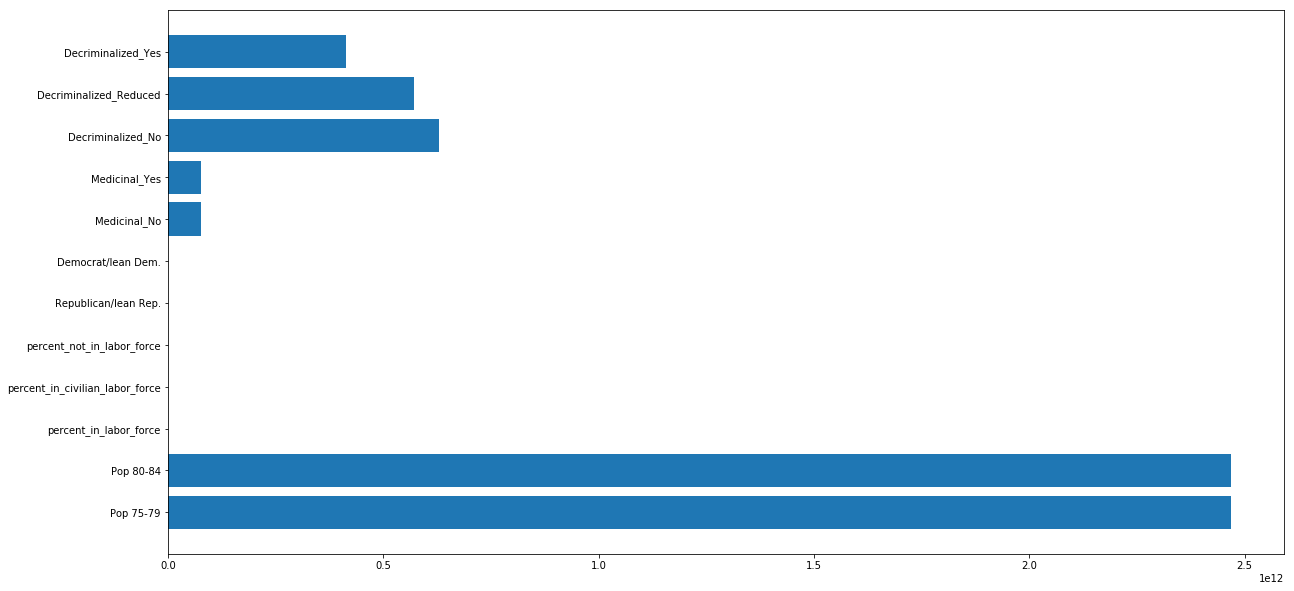

In [321]:
coef_list = linreg.coef_.tolist()

impt_list_c = []
impt_list_f = []
for i in range(len(coef_list)): 
    if abs(coef_list[i]) > 1:
        impt_coef = abs(coef_list[i])
        impt_feat = X_train.columns[i]
        impt_list_c.append(impt_coef)
        impt_list_f.append(impt_feat)
        print(impt_coef, impt_feat)
        
fig, ax = plt.subplots(figsize=(20, 10))
ax.barh(impt_list_f, impt_list_c)

In [322]:
clean_data['prescriptions_per_100'].value_counts()

57.646330     34
55.170833     20
48.488235     14
64.020408     11
56.788636     11
86.800000      9
93.045082      9
0.100000       9
80.700000      9
72.000000      8
1.100000       8
1.600000       8
44.106667      8
61.900000      8
58.600000      8
72.900000      8
71.200000      8
81.300000      8
66.400000      7
54.600000      7
84.200000      7
90.121711      7
0.300000       7
58.700000      7
63.200000      7
94.800000      7
57.600000      7
61.500000      7
65.600000      7
0.500000       6
              ..
43.100000      1
27.600000      1
111.900000     1
163.700000     1
142.400000     1
132.900000     1
47.100000      1
36.600000      1
7.700000       1
114.600000     1
31.900000      1
81.600000      1
7.400000       1
42.600000      1
63.900000      1
106.700000     1
55.600000      1
149.100000     1
134.900000     1
134.800000     1
173.900000     1
147.600000     1
185.100000     1
116.200000     1
19.100000      1
17.100000      1
143.900000     1
147.400000    